<img src='11.jpg'>

In [2]:
#pip install pycaret

In [3]:
import pandas as pd

In [4]:
#Regression AutoMl

In [5]:
from pycaret.regression import*

In [33]:
df=pd.read_csv("train.csv")

In [34]:
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [35]:
setup(data=df,target='MedHouseVal')

,Description,Value
0,Session id,5512
1,Target,MedHouseVal
2,Target type,Regression
3,Original data shape,"(37137, 10)"
4,Transformed data shape,"(37137, 10)"
5,Transformed train set shape,"(25995, 10)"
6,Transformed test set shape,"(11142, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [36]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4041,0.3256,0.5705,0.7578,0.1714,0.2268,1.1070
xgboost,Extreme Gradient Boosting,0.4162,0.3424,0.5850,0.7453,0.1770,0.2341,0.4380
gbr,Gradient Boosting Regressor,0.4291,0.3566,0.5971,0.7347,0.1802,0.2438,5.9910
rf,Random Forest Regressor,0.4243,0.3580,0.5982,0.7336,0.1797,0.2401,18.8370
et,Extra Trees Regressor,0.4305,0.3665,0.6053,0.7273,0.1803,0.2417,6.6410
ada,AdaBoost Regressor,0.6953,0.6847,0.8266,0.4913,0.2748,0.4943,1.3470
dt,Decision Tree Regressor,0.5858,0.7111,0.8431,0.4707,0.2505,0.3229,0.2870
en,Elastic Net,0.6823,0.7695,0.8770,0.4281,0.2777,0.4554,0.0380
llar,Lasso Least Angle Regression,0.7750,0.9662,0.9827,0.2820,0.3101,0.5260,0.0360
lasso,Lasso Regression,0.7750,0.9662,0.9827,0.2820,0.3101,0.5260,0.0360


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [10]:
#%75 başarı oaranını daha yukarı çekmek için deep learning kullanalım

In [11]:
!pip install tensorflow

In [12]:
import tensorflow as tf

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x=df.drop('MedHouseVal',axis=1)
y=df[['MedHouseVal']]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))   #regression olduğu için sadece Dense(1) yazdık. Tek bir değer tahmin edeceğiz
model.compile(loss='mse', optimizer='adam')  #mes mean_squared_error

In [19]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=300)

Epoch 1/300
233/233 [==============================] - 3s 4ms/step - loss: 631.8372 - val_loss: 7.1972
Epoch 2/300
233/233 [==============================] - 1s 3ms/step - loss: 4.0430 - val_loss: 2.1739
Epoch 3/300
233/233 [==============================] - 1s 3ms/step - loss: 1.9896 - val_loss: 2.1773
Epoch 4/300
233/233 [==============================] - 1s 5ms/step - loss: 1.6955 - val_loss: 1.6790
Epoch 5/300
233/233 [==============================] - 1s 5ms/step - loss: 1.7560 - val_loss: 2.9815
Epoch 6/300
233/233 [==============================] - 1s 4ms/step - loss: 4.9238 - val_loss: 1.9759
Epoch 7/300
233/233 [==============================] - 1s 5ms/step - loss: 1.8791 - val_loss: 3.7619
Epoch 8/300
233/233 [==============================] - 1s 4ms/step - loss: 1.7186 - val_loss: 1.5622
Epoch 9/300
233/233 [==============================] - 1s 4ms/step - loss: 1.7254 - val_loss: 1.5420
Epoch 10/300
233/233 [==============================] - 1s 3ms/step - loss: 1.6839 - val_

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
 dense_4 (Dense)             (None, 19)                380       
                                                                 
 dense_5 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1730 (6.76 KB)
Trainable params: 1730 (6.7

In [21]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

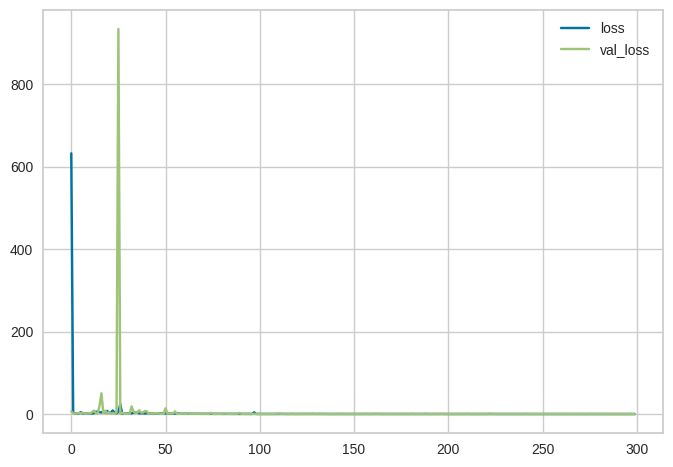

In [22]:
loss_df.plot()

In [23]:
tahmin=model.predict(x_test)

233/233 [==============================] - 0s 2ms/step


In [24]:
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
r2_score(y_test,tahmin)

0.5459888290923837

In [26]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=1300)

Epoch 1/1300
233/233 [==============================] - 4s 15ms/step - loss: 0.5565 - val_loss: 0.5838
Epoch 2/1300
233/233 [==============================] - 1s 6ms/step - loss: 0.5654 - val_loss: 0.5537
Epoch 3/1300
233/233 [==============================] - 1s 3ms/step - loss: 0.5566 - val_loss: 0.5590
Epoch 4/1300
233/233 [==============================] - 1s 3ms/step - loss: 0.5396 - val_loss: 0.5519
Epoch 5/1300
233/233 [==============================] - 1s 3ms/step - loss: 0.5405 - val_loss: 1.1900
Epoch 6/1300
233/233 [==============================] - 1s 3ms/step - loss: 0.5791 - val_loss: 0.6239
Epoch 7/1300
233/233 [==============================] - 1s 3ms/step - loss: 0.5410 - val_loss: 0.5520
Epoch 8/1300
233/233 [==============================] - 1s 3ms/step - loss: 0.5577 - val_loss: 0.6019
Epoch 9/1300
233/233 [==============================] - 1s 3ms/step - loss: 0.5419 - val_loss: 0.6287
Epoch 10/1300
233/233 [==============================] - 1s 3ms/step - loss: 0.54

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
 dense_4 (Dense)             (None, 19)                380       
                                                                 
 dense_5 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1730 (6.76 KB)
Trainable params: 1730 (6.7

In [28]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

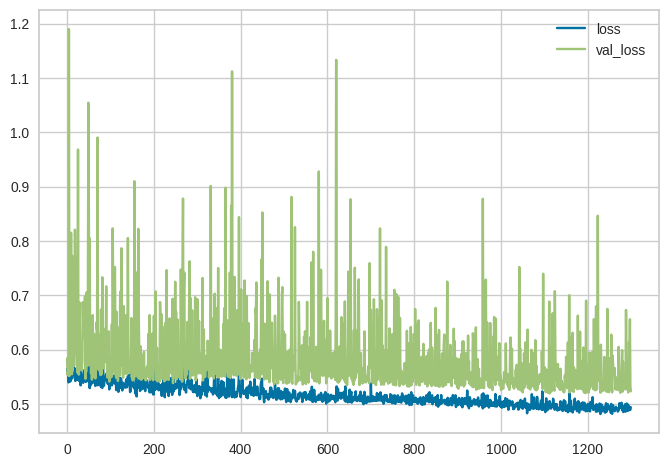

In [29]:
loss_df.plot()

In [30]:
tahmin=model.predict(x_test)

233/233 [==============================] - 1s 3ms/step


In [31]:
r2_score(y_test,tahmin)

0.6151750576697186

In [32]:
mean_squared_error(y_test,tahmin)**.5

0.7233000039693898